In [157]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
import os
import glob as glob
import itertools
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import get_sun
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from pyuvdata import UVData
from matplotlib.colors import SymLogNorm
from matplotlib.ticker import FormatStrFormatter


np.set_printoptions(threshold='nan')


In [135]:
# Inspect some of the files where we see that traveling tick

FlagFilePath='/lustre/aoc/projects/hera/djacobs/IDR2_flags/2458134'
SumFilePath='/lustre/aoc/projects/hera/dlewis/FullSeason_flag_summaries/2458134'
waterfallFilesxx=glob.glob(FlagFilePath + '/*.xx.*.flags.npz')
waterfallFilesxx.sort()
waterfallFilesyy=glob.glob(FlagFilePath + '/*.yy.*.flags.npz')
waterfallFilesyy.sort()
flag_waterfall_xx=[]
flag_waterfall_yy=[]
sum_flag_times_xx=[]
sum_flag_times_yy=[]

for i, flagfile in enumerate(waterfallFilesxx):
    flag_data=np.load(flagfile)
    timelen=len(flag_data['waterfall'])
#     time_mean_xx.append(np.mean(flag_data['flag_array'],axis=(0,1,3)))
    chan_mean_temp=np.mean(flag_data['flag_array'], axis=(1,2,3))
    numbaseline=len(chan_mean_temp)/timelen
#     chantemp=np.reshape(chan_mean_temp,(timelen, numbaseline))
#     chan_mean_xx.extend(np.mean(chantemp, axis=1))
    waterfalltempxx=np.reshape(flag_data['flag_array'], (timelen, numbaseline, 1,1024,1))
    flag_waterfall_xx.extend(np.average(waterfalltempxx, axis=1).squeeze())
    flag_sum_data=np.load(SumFilePath +flagfile[-38:-5]+'_summary.npz')
    sum_flag_times_xx.extend(flag_sum_data['times'])

# for i, flagfile in enumerate(waterfallFilesyy):    
#     flag_data=np.load(flagfile)
#     timelen=len(flag_data['waterfall'])
# #     time_mean_xx.append(np.mean(flag_data['flag_array'],axis=(0,1,3)))
#     chan_mean_temp=np.mean(flag_data['flag_array'], axis=(1,2,3))
#     numbaseline=len(chan_mean_temp)/timelen
# #     chantemp=np.reshape(chan_mean_temp,(timelen, numbaseline))
# #     chan_mean_xx.extend(np.mean(chantemp, axis=1))
#     waterfalltempyy=np.reshape(flag_data['flag_array'], (timelen, numbaseline, 1,1024,1))
#     flag_waterfall_yy.extend(np.average(waterfalltempyy, axis=1).squeeze())
#     flag_sum_data=np.load(SumFilePath +flagfile[-38:-5]+'_summary.npz')
#     sum_flag_times_yy.extend(flag_sum_data['times'])

In [136]:
freqTicks=np.linspace(100,200, 1024)
freqLabel=[0]*len(freqTicks)
float_formatter = lambda x: "%.2f" % x
for i, num in enumerate (freqTicks):
    freqLabel[i]='{:.6}'.format(num)
print freqLabel

['100.0', '100.098', '100.196', '100.293', '100.391', '100.489', '100.587', '100.684', '100.782', '100.88', '100.978', '101.075', '101.173', '101.271', '101.369', '101.466', '101.564', '101.662', '101.76', '101.857', '101.955', '102.053', '102.151', '102.248', '102.346', '102.444', '102.542', '102.639', '102.737', '102.835', '102.933', '103.03', '103.128', '103.226', '103.324', '103.421', '103.519', '103.617', '103.715', '103.812', '103.91', '104.008', '104.106', '104.203', '104.301', '104.399', '104.497', '104.594', '104.692', '104.79', '104.888', '104.985', '105.083', '105.181', '105.279', '105.376', '105.474', '105.572', '105.67', '105.767', '105.865', '105.963', '106.061', '106.158', '106.256', '106.354', '106.452', '106.549', '106.647', '106.745', '106.843', '106.94', '107.038', '107.136', '107.234', '107.331', '107.429', '107.527', '107.625', '107.722', '107.82', '107.918', '108.016', '108.113', '108.211', '108.309', '108.407', '108.504', '108.602', '108.7', '108.798', '108.895',

In [137]:
print len(sum_flag_times_xx[0:2000])
print len(np.linspace(0,len(sum_flag_times_xx[:2000]),40, endpoint=False))


2000
40


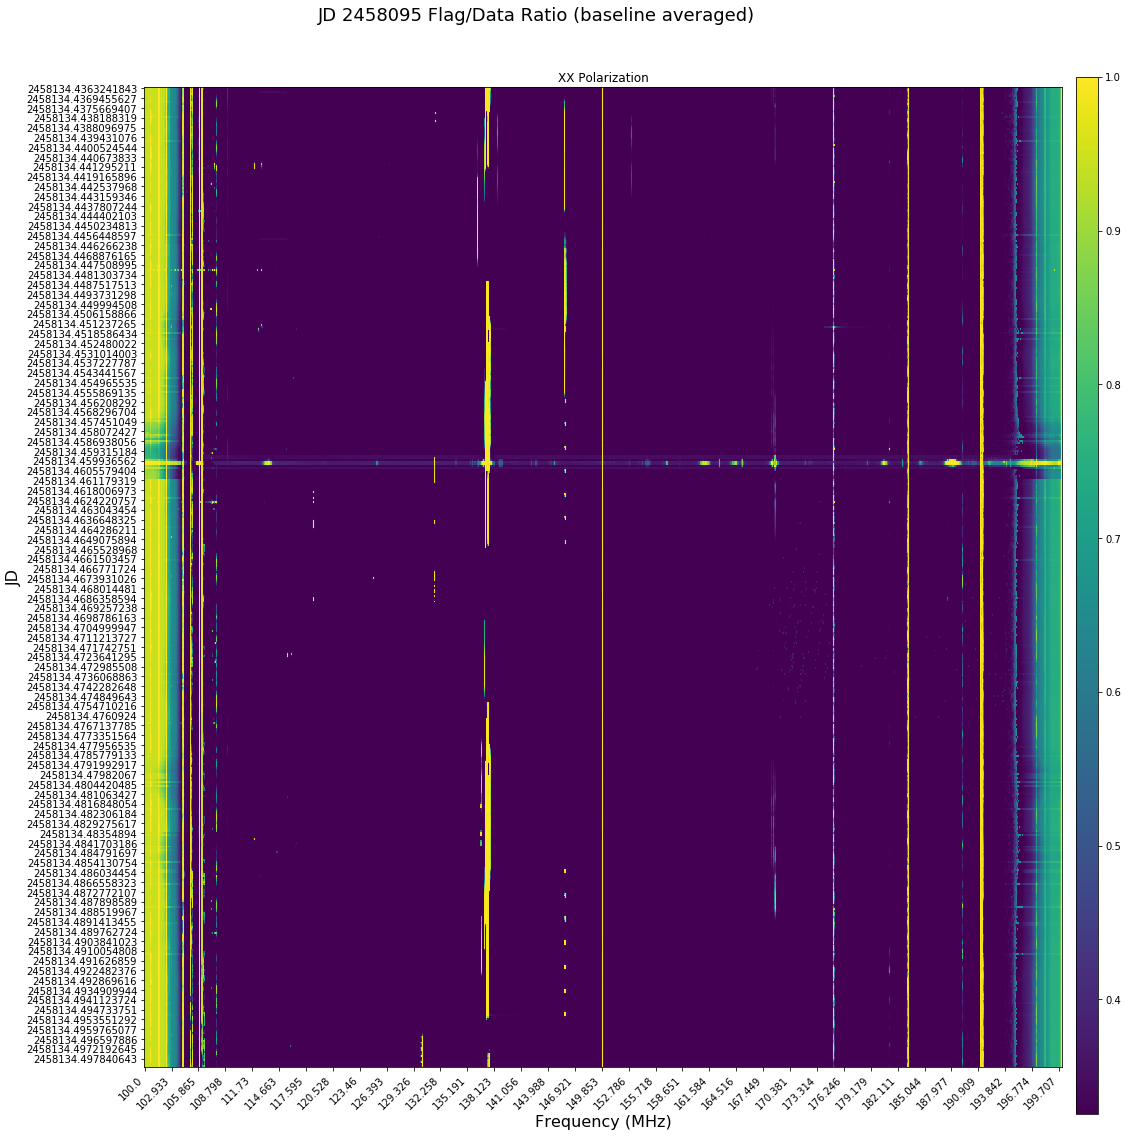

In [144]:
#Plot flag waterfalls

fig, axarr3 = plt.subplots( figsize=(15,15))
#plt.setp(axarr,yticks=np.arange(0,4353,60),yticklabels=sum_flag_times_xx[::60])
plt.suptitle('JD 2458095 Flag/Data Ratio (baseline averaged)', y=1.05, fontsize=18)
#xx waterfall
axarr3.set_title('XX Polarization')
axarr3.set_ylabel('JD', fontsize=16)
axarr3.set_xlabel('Frequency (MHz)', fontsize=16)
im=axarr3.imshow(flag_waterfall_xx[2500:3000],aspect='auto')
axarr3.set_xticks(np.arange(0,1024,30))
axarr3.set_xticklabels(freqLabel[::30], rotation=45, ha='right')
axarr3.set_yticks(np.arange(0,len(sum_flag_times_xx[2500:3000]),5))
axarr3.set_yticklabels(sum_flag_times_xx[2500:3000:5])



#yy waterfall
# axarr3[1].set_title('YY polarization')
# axarr3[1].set_ylabel('JD', fontsize=16)
# axarr3[1].set_xlabel('Frequency Channel', fontsize=16)
# im=axarr3[1].imshow(flag_waterfall_yy,aspect='auto')
#colorbar
# plt.colorbar()
cb_ax = fig.add_axes([1, .025, 0.02, .96])
cbar = fig.colorbar(im, cax=cb_ax)

plt.tight_layout()
plt.show()

In [97]:
UVFILE_PATH='/lustre/aoc/projects/hera/dlewis/2458134_investigate/2458134'

uv=UVData()
ant1=1
ant2=11
uvfilelist=glob.glob(UVFILE_PATH + '/*.uv')
uvfilelist.sort()
print uvfilelist

['/lustre/aoc/projects/hera/dlewis/2458134_investigate/2458134/zen.2458134.45372.xx.HH.uv', '/lustre/aoc/projects/hera/dlewis/2458134_investigate/2458134/zen.2458134.46118.xx.HH.uv', '/lustre/aoc/projects/hera/dlewis/2458134_investigate/2458134/zen.2458134.46864.xx.HH.uv']


In [98]:
uv_waterfall_xx=[]
uv_times_xx=[]

for i, uvfile in enumerate(uvfilelist):

    print ('Loading ' + uvfile)
    uv.read_miriad(uvfile)
    timelen=uv.Ntimes
    numbaseline=uv.Nbls
    uv_times_xx.extend(uv.get_times(ant1, ant2))
    waterfalltempxx=np.reshape(uv.data_array, (timelen, numbaseline, 1,1024,1))
    print waterfalltempxx.shape
    uv_waterfall_xx.extend(np.average(waterfalltempxx, axis=1).squeeze())

Loading /lustre/aoc/projects/hera/dlewis/2458134_investigate/2458134/zen.2458134.45372.xx.HH.uv
(60, 1891, 1, 1024, 1)
Loading /lustre/aoc/projects/hera/dlewis/2458134_investigate/2458134/zen.2458134.46118.xx.HH.uv
(60, 1891, 1, 1024, 1)
Loading /lustre/aoc/projects/hera/dlewis/2458134_investigate/2458134/zen.2458134.46864.xx.HH.uv
(60, 1891, 1, 1024, 1)


In [99]:
print uv_times_xx

[2458134.4537227787, 2458134.4538470544, 2458134.45397133, 2458134.4540956058, 2458134.4542198814, 2458134.4543441567, 2458134.4544684323, 2458134.454592708, 2458134.4547169837, 2458134.4548412594, 2458134.454965535, 2458134.455089811, 2458134.4552140865, 2458134.455338362, 2458134.455462638, 2458134.4555869135, 2458134.455711189, 2458134.455835465, 2458134.4559597406, 2458134.4560840162, 2458134.456208292, 2458134.4563325676, 2458134.4564568433, 2458134.456581119, 2458134.4567053947, 2458134.4568296704, 2458134.456953946, 2458134.4570782217, 2458134.4572024974, 2458134.457326773, 2458134.457451049, 2458134.4575753245, 2458134.4576996, 2458134.457823876, 2458134.4579481515, 2458134.458072427, 2458134.458196703, 2458134.4583209786, 2458134.4584452542, 2458134.45856953, 2458134.4586938056, 2458134.4588180813, 2458134.458942357, 2458134.4590666327, 2458134.4591909084, 2458134.459315184, 2458134.4594394597, 2458134.4595637354, 2458134.459688011, 2458134.459812287, 2458134.459936562, 245813

In [127]:
print len(uv_times_xx[40:60])
print uv_times_xx[1]-2458134

20
0.4538470543920994


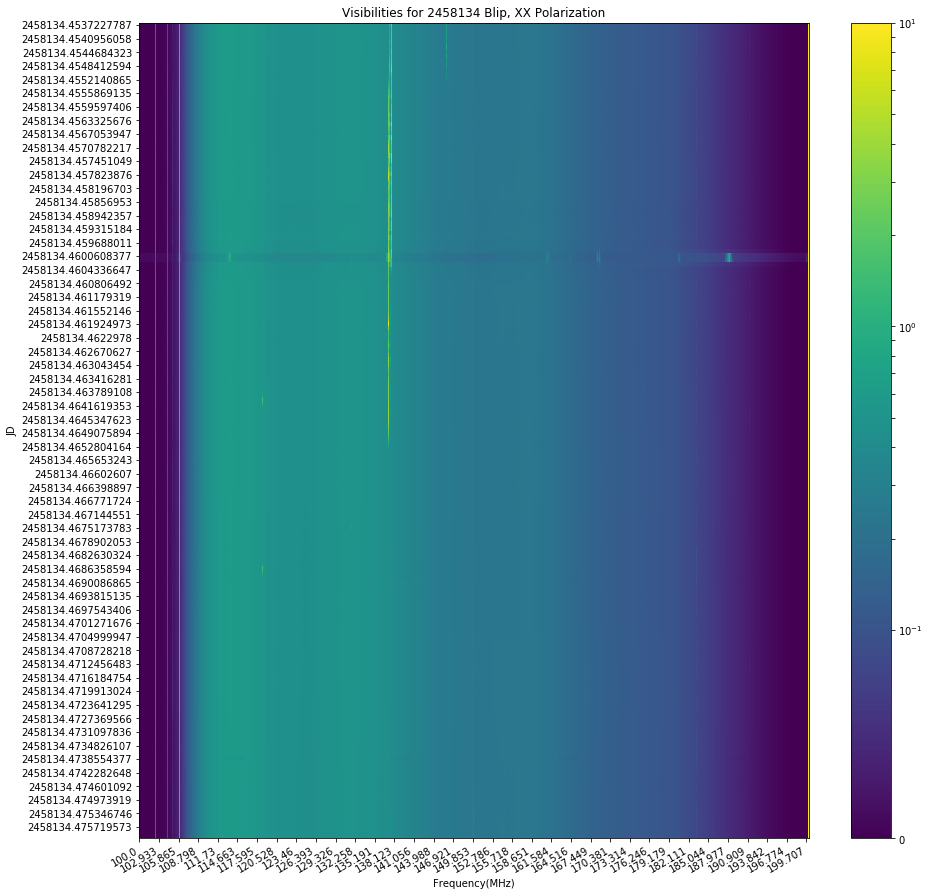

In [153]:
plt.figure(figsize=(15,15))
plt.imshow(np.abs(uv_waterfall_xx[:]),aspect='auto',norm=SymLogNorm(vmin=0,vmax=10,linthresh=.1) )
plt.yticks(np.arange(0,len(uv_waterfall_xx),3),uv_times_xx[::3])
plt.xticks(np.arange(0,1024,30),freqLabel[::30], rotation=30, ha='right')
plt.ylabel('JD')
plt.xlabel('Frequency(MHz)')
plt.title('Visibilities for 2458134 Blip, XX Polarization')
plt.colorbar()
plt.show()

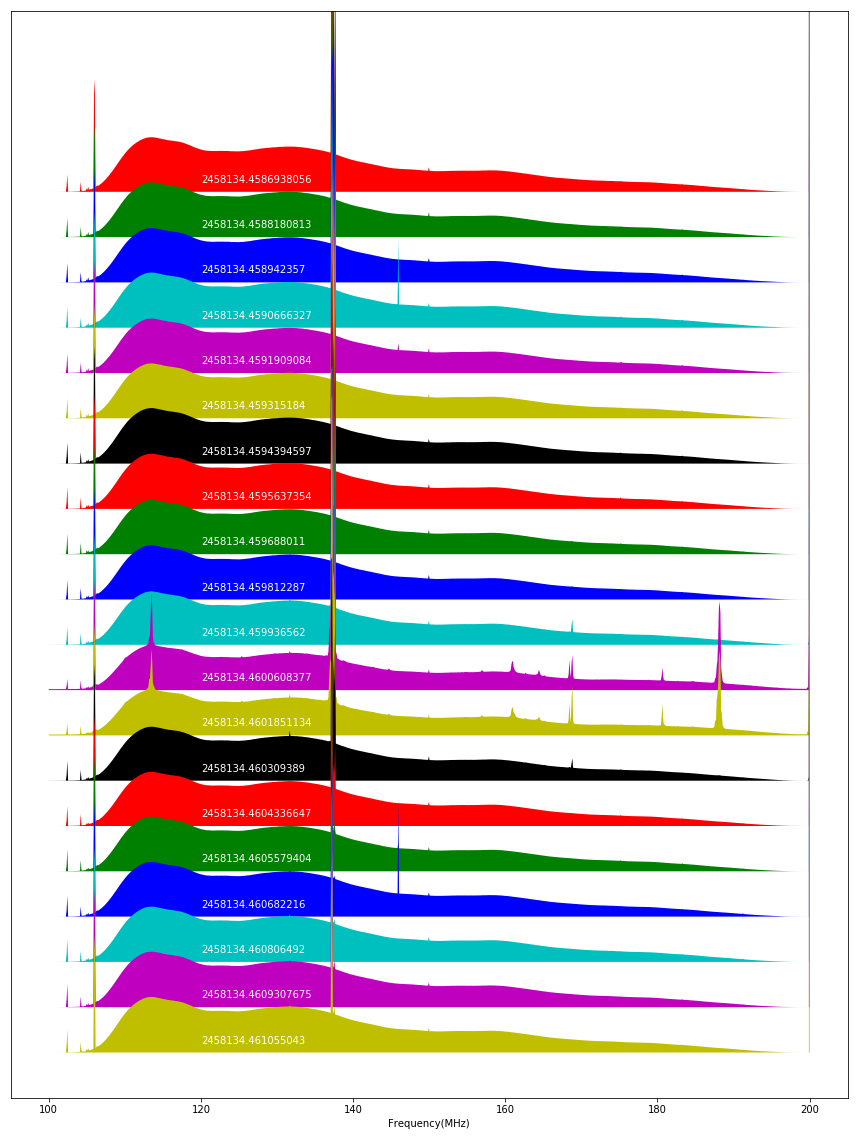

In [118]:
#set displacement for joy plot
displace = (.5)
chans=np.linspace(0,1024,1024)
freqs=np.linspace(100, 200, num=len(uv_waterfall_xx[45]))
# Add a cutoff
# chantrail[chantrail<=0] = None

face_colors = itertools.cycle(['r','g','b','c','m','y','k']) #rotate through these colors

#Create a joyplot of the graphs above for time average
fig = plt.figure(figsize=(15,20))
gs1=GridSpec(nrows=1,ncols=1,width_ratios=[1]) #gridspec is used to keep subplots neat
gs1.update(wspace=1, hspace=0, )
ax = fig.add_subplot(gs1[:,:1])
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(False)
ax.set_ylim(-10,2)
ax.set_xlabel('Frequency(MHz)')
for n,y in enumerate(uv_waterfall_xx[40:60]):
    # Vertically displace each plot. This makes labeling funky, so the daily average will be labeled instead.
    y0 = np.ones(y.shape) * -n * displace
    y1 = np.abs(y) - n*displace

    #plt.plot(chans,y1,lw=1, color=face_colors.next(),zorder=-len(chantrail)+n)
    plt.fill_between(freqs, y0,y1,lw=0, edgecolor='black',facecolor=face_colors.next(),zorder=-len(uv_waterfall_xx)+n)
    plt.text(120,y0[0]+.1,uv_times_xx[40:60][n], color='w')
plt.show()

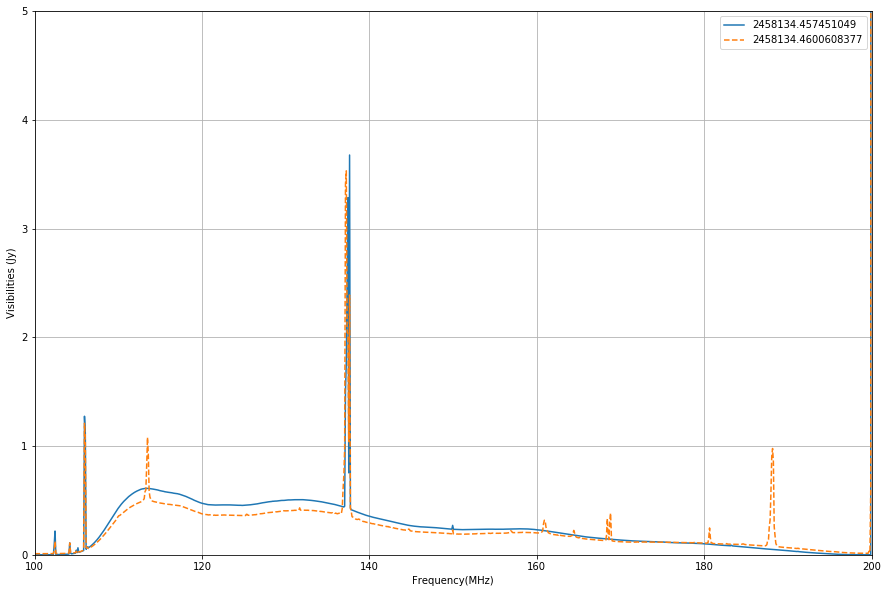

In [167]:
plt.figure(figsize=(15,10))
plt.plot(np.linspace(100, 200, num=len(uv_waterfall_xx[30])),np.abs(uv_waterfall_xx[30]), label=str(uv_times_xx[30]), ls='-')
plt.plot(np.linspace(100, 200, num=len(uv_waterfall_xx[51])),np.abs(uv_waterfall_xx[51]), label=str(uv_times_xx[51]), ls='--')
# plt.plot(np.abs(uv_waterfall_xx[52]), label=str(uv_times_xx[52]), ls='-.')
# plt.plot(np.abs(uv_waterfall_xx[52]), label=str(uv_times_xx[53]), ls=':')

plt.xlabel('Frequency(MHz)')
plt.ylabel('Visibilities (Jy)')
plt.xlim(100,200)
plt.ylim(0,5)
plt.grid()
plt.legend()
plt.show()

In [ ]:
'''
To Do
[ ] List of times blip occurs
[ ]
[ ]
[ ]
'''